<a href="https://colab.research.google.com/github/DhatriPola/AirlineSatisfactionML/blob/main/AirlineSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'pickle'> **Import useful libraries**

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <Font color = 'pickle'>**Load Data**

Importing the Dataset - Airline Satisfaction.
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger?

In [32]:
train_data=pd.read_csv("/content/drive/MyDrive/Arline /train.csv",index_col=0)
train_data.shape

(103904, 24)

In [34]:
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [35]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [37]:
train_data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [38]:
train_data.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes        

# <Font color = 'pickle'>**Data Preprocessing**

In [39]:
numerical_cols = [col for col in train_data.columns if train_data[col].dtypes in ['int64','float64']]
numerical_cols

['id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [40]:
train_data[numerical_cols].describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


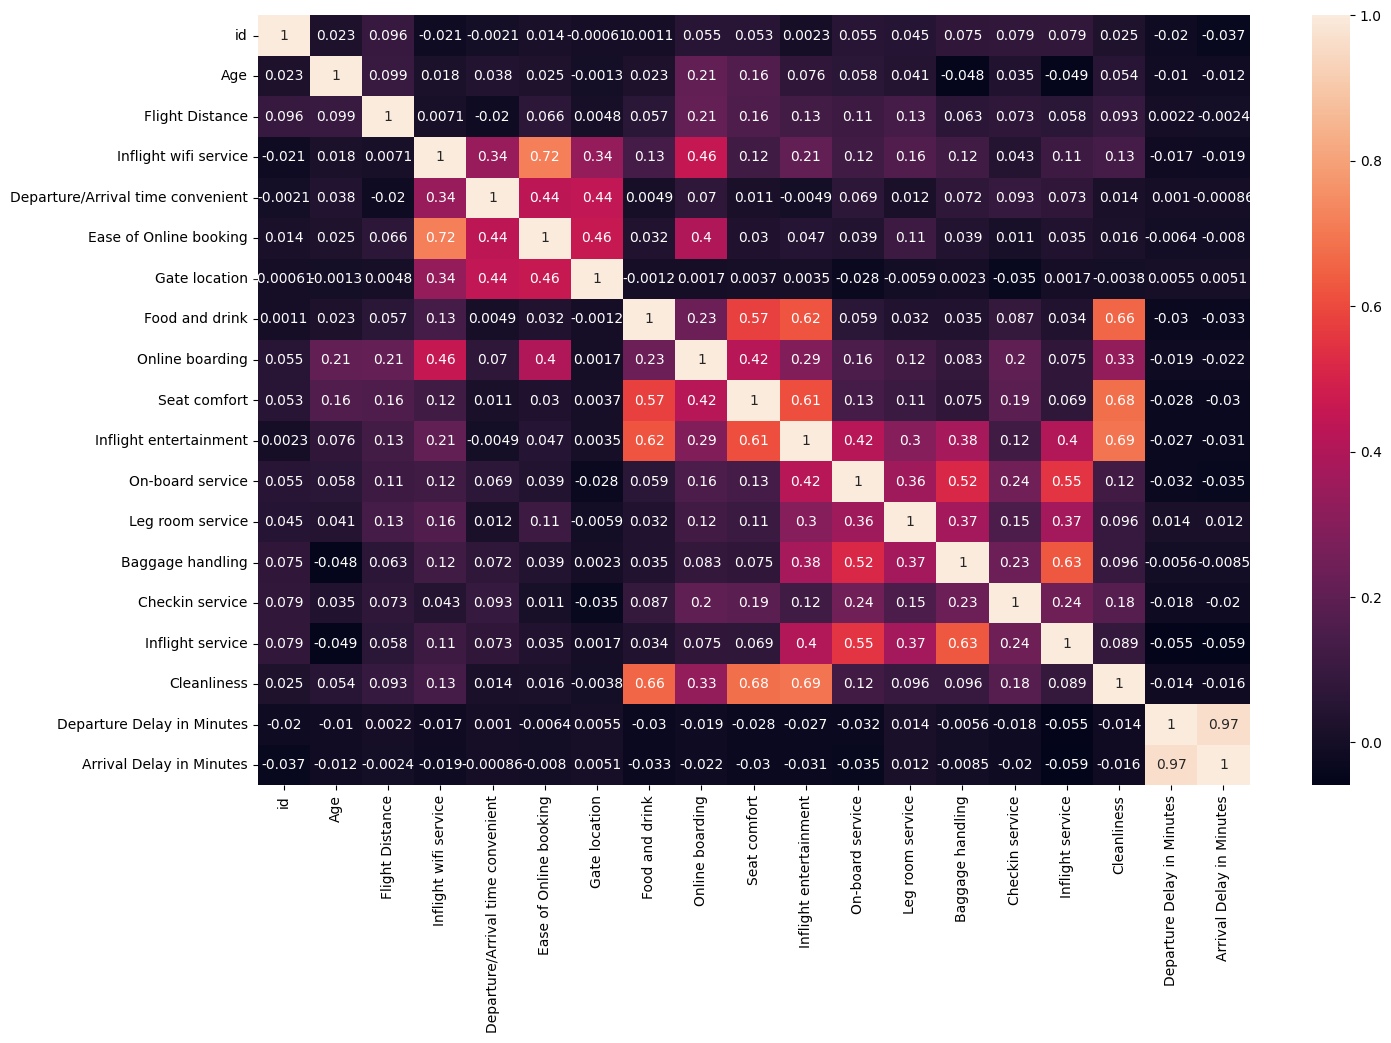

In [41]:
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_data[numerical_cols].corr(), annot=True)
plt.show()

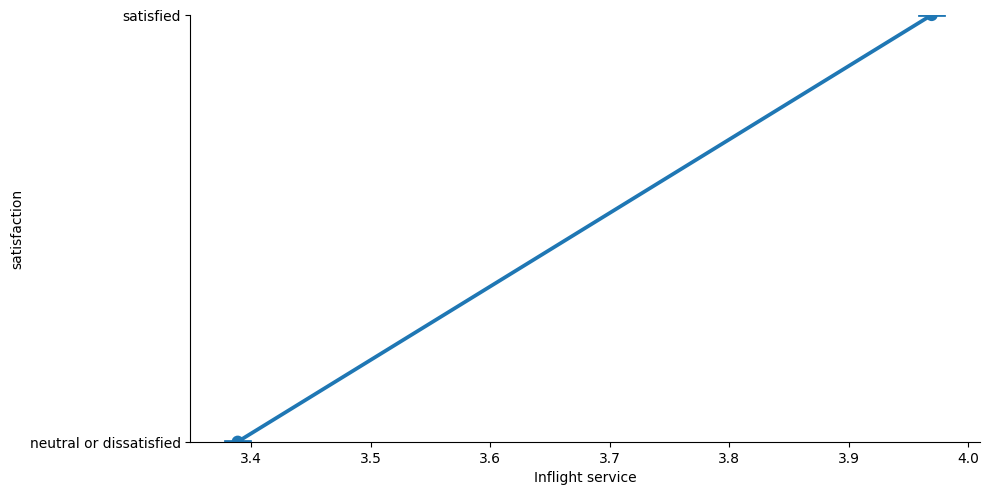

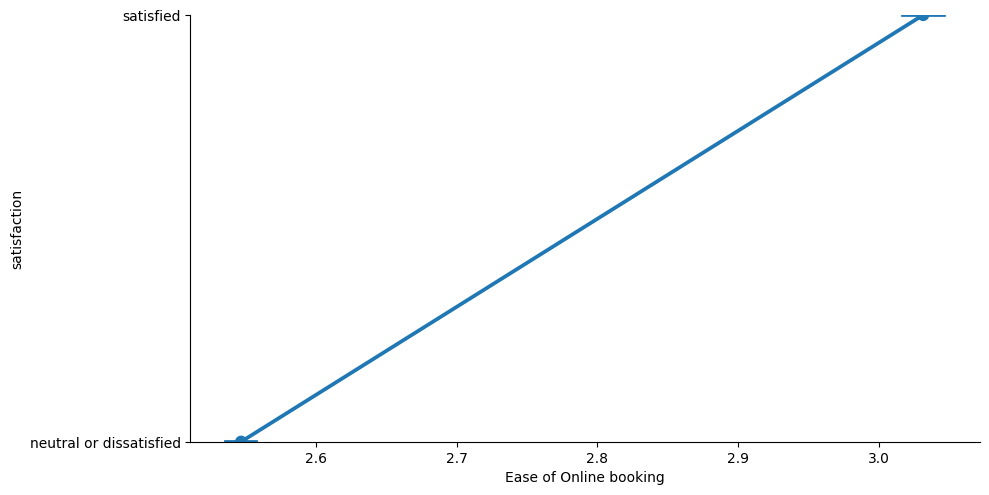

In [42]:
#Inflight wifi service with Ease of Online booking had a correlation of 0.72
for col in ['Inflight service', 'Ease of Online booking']:
    sns.catplot(x=col, y='satisfaction', data=train_data, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [43]:
#Categorical Columns
categorical_cols = [col for col in train_data.columns if train_data[col].dtypes in ['object']]
#categorical_cols.append('satisfaction')  #Adding the satisfaction(target) column for EDA
categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [44]:
for c in categorical_cols:
    print(c)
    print(train_data[c].unique())

Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']
satisfaction
['neutral or dissatisfied' 'satisfied']


In [45]:
train_data["satisfaction"]=train_data["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

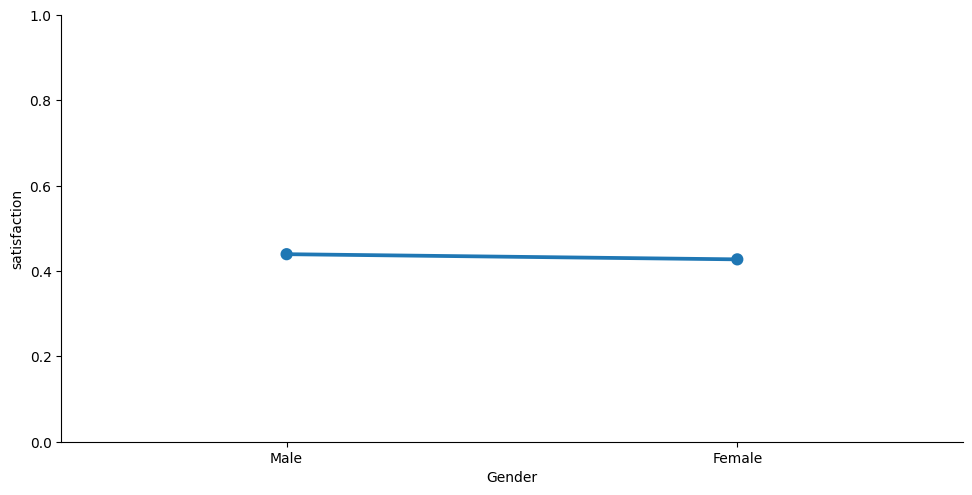

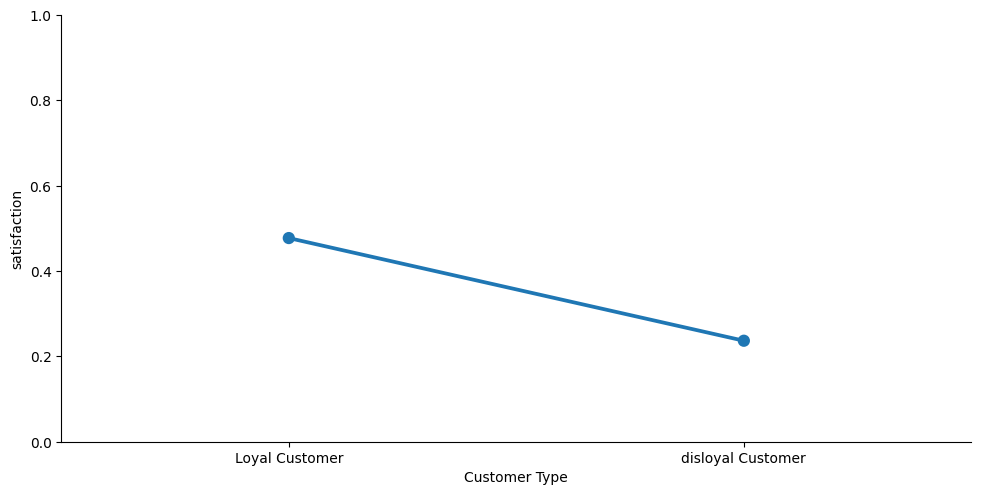

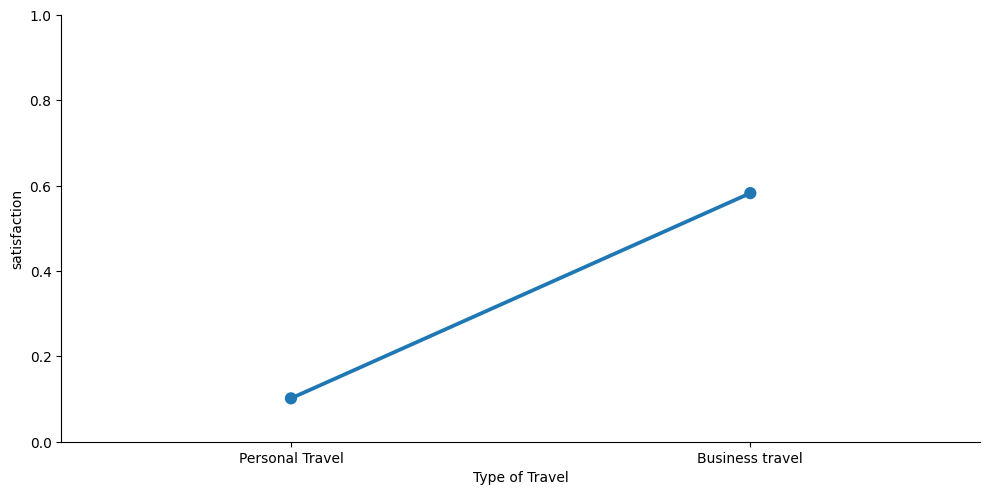

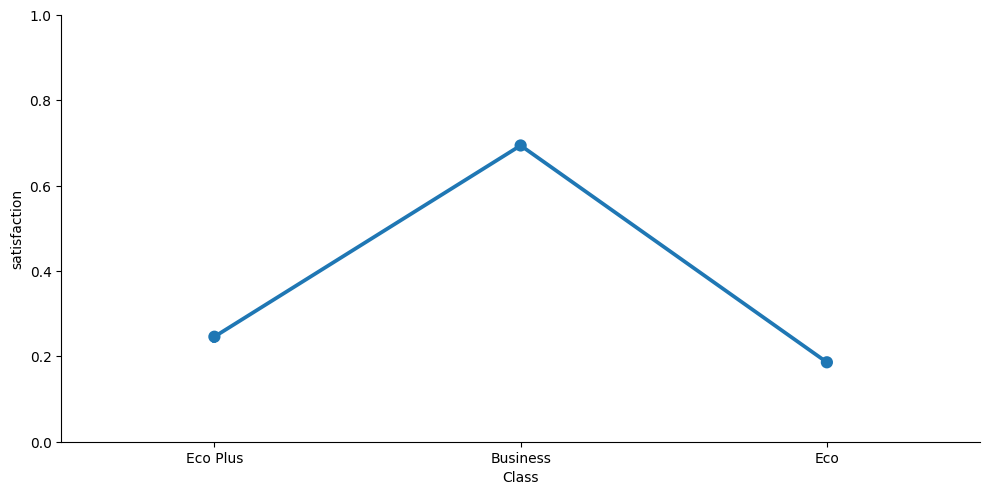

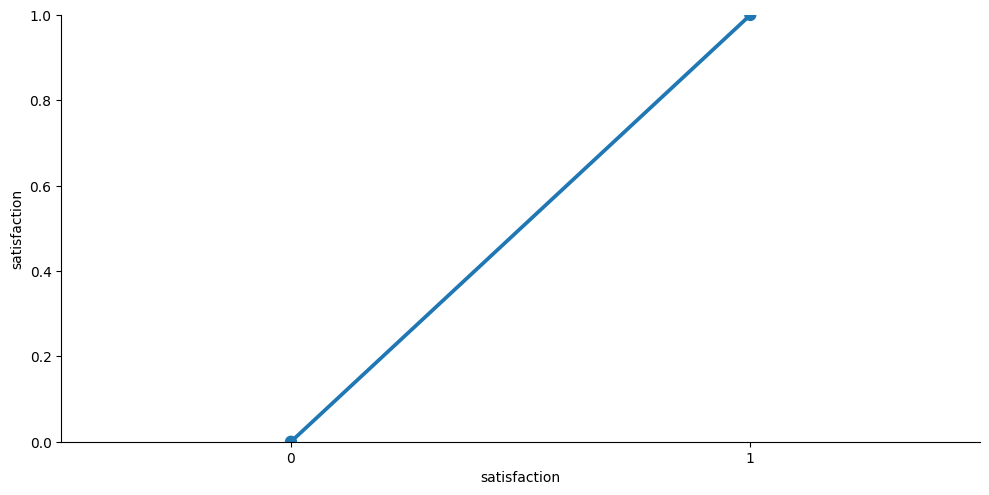

In [46]:
#Categorical plots for categorical features
for col in categorical_cols:
    sns.catplot(x=col, y='satisfaction', data=train_data, kind='point', aspect=2, )
    plt.ylim(0, 1)  #Ylim makes the y axis Min->0 and Max->1

In [47]:
train_data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [48]:
#Filling the missing values in attribute - Arrival Delay in Minutes- with the mode
value=train_data["Arrival Delay in Minutes"].mode()[0]
train_data["Arrival Delay in Minutes"].fillna(value,inplace=True)

In [49]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data[numerical_cols] = sc.fit_transform(train_data[numerical_cols])
train_data.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.140077,Male,Loyal Customer,-1.745279,Personal Travel,Eco Plus,-0.731539,0.203579,0.616172,0.173776,...,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169,0
1,-1.598276,Male,disloyal Customer,-0.951360,Business travel,Business,-0.957184,0.203579,-0.695245,0.173776,...,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,0
2,1.203935,Female,Loyal Customer,-0.885200,Business travel,Business,-0.047584,-0.549533,-0.695245,-0.541060,...,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554,1


# <Font color = 'pickle'>**Performing One-Hot Encoding**

In [50]:
train_data["Gender"]=train_data["Gender"].map({"Male":0,"Female":1})
train_data["Customer Type"]=train_data["Customer Type"].map({"disloyal Customer":0,"Loyal Customer":1})
train_data["Type of Travel"]=train_data["Type of Travel"].map({"Personal Travel":0,"Business travel":1})
train_data["Class"]=train_data["Class"].map({"Eco":0,"Eco Plus":1,"Business":2})

In [51]:
X_train=train_data.drop("satisfaction",axis=1)
y_train=train_data["satisfaction"]

In [52]:
X_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.140077,0,1,-1.745279,0,1,-0.731539,0.203579,0.616172,0.173776,...,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169
1,-1.598276,0,0,-0.951360,1,2,-0.957184,0.203579,-0.695245,0.173776,...,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313
2,1.203935,1,1,-0.885200,1,2,-0.047584,-0.549533,-0.695245,-0.541060,...,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554
3,-1.091678,1,1,-0.951360,1,2,-0.629246,-0.549533,1.271880,1.603448,...,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692
4,1.451402,0,1,1.430397,1,2,-0.978244,0.203579,-0.039537,0.173776,...,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554


# <Font color = 'pickle'>**Using Mutual Info Classifier To Identify Idenpendent And Dependent Variables**

<Axes: >

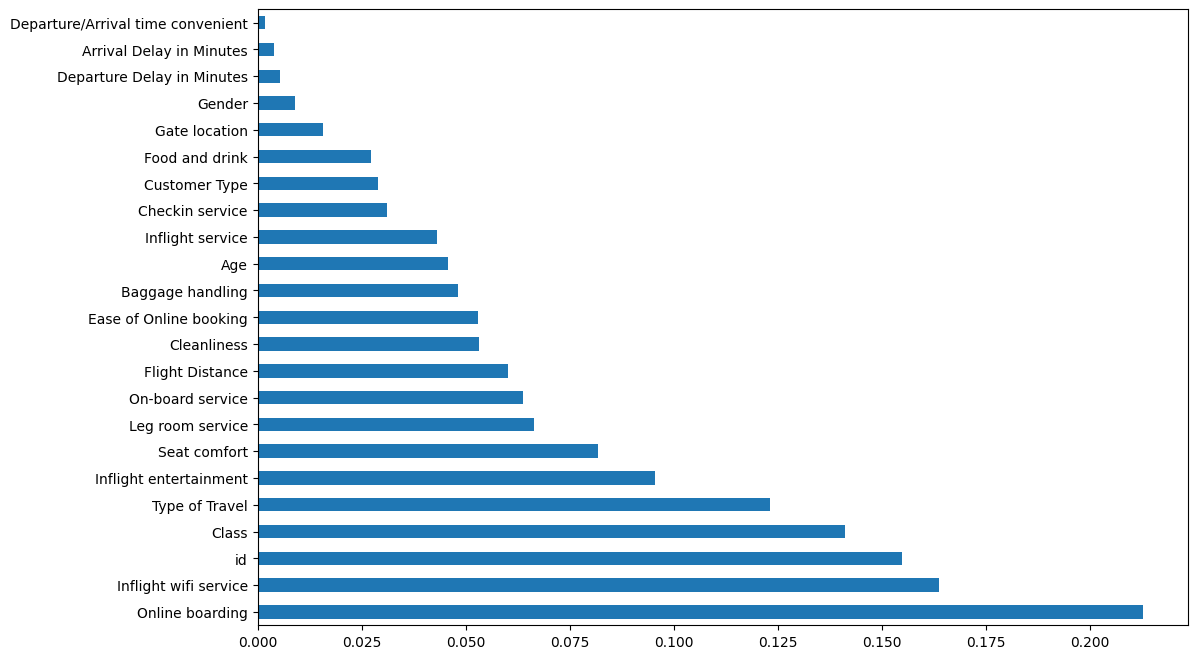

In [53]:
from sklearn.feature_selection import mutual_info_classif
plt.figure(figsize=(12,8))
pd.Series(mutual_info_classif(X_train,y_train),index=X_train.columns).sort_values(ascending=False).plot(kind="barh")

# <Font color = 'pickle'>**Feature Selection Based On Results Of Scaling**

In [54]:
series=pd.Series(mutual_info_classif(X_train,y_train),index=X_train.columns).sort_values()
feature_selection=series[series>0.05].index

In [55]:
feature_selection

Index(['Ease of Online booking', 'Cleanliness', 'Flight Distance',
       'On-board service', 'Leg room service', 'Seat comfort',
       'Inflight entertainment', 'Type of Travel', 'Class', 'id',
       'Inflight wifi service', 'Online boarding'],
      dtype='object')

Index(['Ease of Online booking', 'Cleanliness', 'On-board service',
       'Flight Distance', 'Leg room service', 'Seat comfort',
       'Inflight entertainment', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Online boarding'],
      dtype='object')

We now end up with 11 Features which we will use to build our model

In [56]:
X_train=X_train[feature_selection]

In [57]:
X_train.shape

(103904, 12)

# <Font color = 'pickle'>**Neural Network**

In [58]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

In [59]:
# Function to create model, required for KerasClassifier
def create_model1(activation='relu', neurons=128):
	# create model
	model = Sequential()
	model.add(Dense(units=neurons, input_dim=8, kernel_initializer='uniform', activation=activation, kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [64]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Arline /diabetes.csv", delimiter=",",skiprows=1)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model1, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['relu', 'tanh']
neurons = [128, 256]
param_grid = {'neurons':neurons, 'activation':activation}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-64-a7d50a409086>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model1, epochs=100, batch_size=10, verbose=0)


Best: 0.721354 using {'activation': 'relu', 'neurons': 256}
0.708333 (0.015073) with: {'activation': 'relu', 'neurons': 128}
0.721354 (0.027126) with: {'activation': 'relu', 'neurons': 256}
0.717448 (0.015733) with: {'activation': 'tanh', 'neurons': 128}
0.703125 (0.017758) with: {'activation': 'tanh', 'neurons': 256}


In [61]:
# Function to create model, required for KerasClassifier
def create_model2(activation='relu', neurons=(128, 64)):
	# create model
  model = Sequential()
  model.add(Dense(units=neurons[0], input_dim=8, kernel_initializer='uniform', activation=activation, kernel_constraint=maxnorm(4)))
  model.add(Dropout(0.2))
  model.add(Dense(units=neurons[1], kernel_initializer='uniform', activation=activation, kernel_constraint=maxnorm(4)))
  model.add(Dropout(0.2))
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [65]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Arline /diabetes.csv", delimiter=",",skiprows=1)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['relu', 'tanh']
neurons = [(128, 64), (256, 128)]
param_grid = {'neurons':neurons, 'activation':activation}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-65-4005e9379a83>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=10, verbose=0)


Best: 0.730469 using {'activation': 'relu', 'neurons': (128, 64)}
0.730469 (0.035516) with: {'activation': 'relu', 'neurons': (128, 64)}
0.713542 (0.027866) with: {'activation': 'relu', 'neurons': (256, 128)}
0.713542 (0.024774) with: {'activation': 'tanh', 'neurons': (128, 64)}
0.695312 (0.039964) with: {'activation': 'tanh', 'neurons': (256, 128)}


Based on the best model above, modify the parameters for the below code
activation = 
neurons = 
(Already updated): cv = 10


In [66]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Arline /diabetes.csv", delimiter=",",skiprows=1)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['relu', 'tanh']
neurons = [(128, 64), (256, 128)]
param_grid = {'neurons':neurons, 'activation':activation}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-66-7c29800cdf1d>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=10, verbose=0)


Best: 0.730451 using {'activation': 'relu', 'neurons': (128, 64)}
0.730451 (0.048689) with: {'activation': 'relu', 'neurons': (128, 64)}
0.725273 (0.055862) with: {'activation': 'relu', 'neurons': (256, 128)}
0.705707 (0.063257) with: {'activation': 'tanh', 'neurons': (128, 64)}
0.682348 (0.047352) with: {'activation': 'tanh', 'neurons': (256, 128)}
